In [16]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [17]:
df = pd.read_csv("./encoded_df.csv")
df.head()

,le_gender,le_color1,le_color2,le_breed1,le_breed2,le_intake_type,le_intake_condition,le_intake_sex,le_outcome_type,le_outcome_sex,le_outcome_d_m,le_intake_d_m,Outcome_Age_Month,Duration_Day
0,1,35,33,326,106,2,5,1,5,1,5,5,80,1.113889
1,1,35,33,326,106,2,5,1,5,1,3,3,89,1.259722
2,1,33,36,124,166,1,5,1,7,1,6,6,120,4.970139
3,1,12,33,309,166,2,3,1,5,1,2,2,193,0.119444
4,0,2,33,217,120,3,0,2,5,2,2,2,185,0.870833


In [18]:
target = df["le_outcome_type"]
target_names = ["Adoption", "Died", "Disposal", "Euthanasia", "Missing", "Return to Owner", "Rto-Adopt", "Transfer"]


In [19]:
data = df.drop("le_outcome_type", axis=1)
variables = data.columns
data.head()

,le_gender,le_color1,le_color2,le_breed1,le_breed2,le_intake_type,le_intake_condition,le_intake_sex,le_outcome_sex,le_outcome_d_m,le_intake_d_m,Outcome_Age_Month,Duration_Day
0,1,35,33,326,106,2,5,1,1,5,5,80,1.113889
1,1,35,33,326,106,2,5,1,1,3,3,89,1.259722
2,1,33,36,124,166,1,5,1,1,6,6,120,4.970139
3,1,12,33,309,166,2,3,1,1,2,2,193,0.119444
4,0,2,33,217,120,3,0,2,2,2,2,185,0.870833


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6844507080061741

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7873968190054359

In [23]:
sorted(zip(rf.feature_importances_, variables), reverse=True)

[(0.29277719508410244, 'Duration_Day'),
 (0.12545605024093362, 'Outcome_Age_Month'),
 (0.10999566785997886, 'le_intake_type'),
 (0.10459068994746033, 'le_outcome_sex'),
 (0.08196536346955473, 'le_breed1'),
 (0.05390660922816751, 'le_color1'),
 (0.049938937389920175, 'le_intake_d_m'),
 (0.04966213048350763, 'le_outcome_d_m'),
 (0.038474709305570745, 'le_color2'),
 (0.03285955281610154, 'le_intake_sex'),
 (0.03075872917247927, 'le_breed2'),
 (0.02120939701571447, 'le_intake_condition'),
 (0.008404967986508603, 'le_gender')]

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
rf_cv_score = cross_val_score(rf, data, target, cv=10, scoring='roc_auc')

ValueError: multiclass format is not supported

In [26]:
rf_predict = rf.predict(X_test)

In [27]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rf_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rf_predict))
print('\n')
print("=== All AUC Scores ===")
#print(rf_cv_score)
print('\n')
print("=== Mean AUC Score ===")
#print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

=== Confusion Matrix ===
[[6445    0    0    6    0  155    0  308]
 [  11    1    0    2    0    3    0   30]
 [   0    0    0    0    0    2    0    2]
 [  99    0    0   89    0   80    0  117]
 [   1    0    0    0    0    1    0    4]
 [ 464    0    0   12    0 3570    1  193]
 [  75    0    0    0    0   10    0   15]
 [1364    3    0   19    0  191    0 1628]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      6914
           1       0.25      0.02      0.04        47
           2       0.00      0.00      0.00         4
           3       0.70      0.23      0.35       385
           4       0.00      0.00      0.00         6
           5       0.89      0.84      0.87      4240
           6       0.00      0.00      0.00       100
           7       0.71      0.51      0.59      3205

   micro avg       0.79      0.79      0.79     14901
   macro avg       0.41      0.32      0.34     14901
we

/Users/suprajasharma/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
y_pred = rf.fit(X_train, y_train).predict(X_train)

In [14]:
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

array([[20674,     0,     0,     0,     0,     0,     0,     0],
       [    0,   144,     0,     0,     0,     0,     0,     0],
       [    0,     0,    13,     0,     0,     0,     0,     0],
       [    0,     0,     0,  1200,     0,     0,     0,     0],
       [    0,     0,     0,     0,    20,     0,     0,     0],
       [    0,     0,     0,     0,     0, 12763,     0,     0],
       [    0,     0,     0,     0,     0,     0,   294,     0],
       [    0,     0,     0,     0,     0,     0,     0,  9592]])

In [15]:
# Sensitivity of model: Percentage of positives correctly identified
print('The sensitivity is: ' + str(conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])))

# Specificity of the model: Percentage of negatives correctly identified
print('The specificity is: ' + str(conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])))

The sensitivity is: 1.0
The specificity is: 1.0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

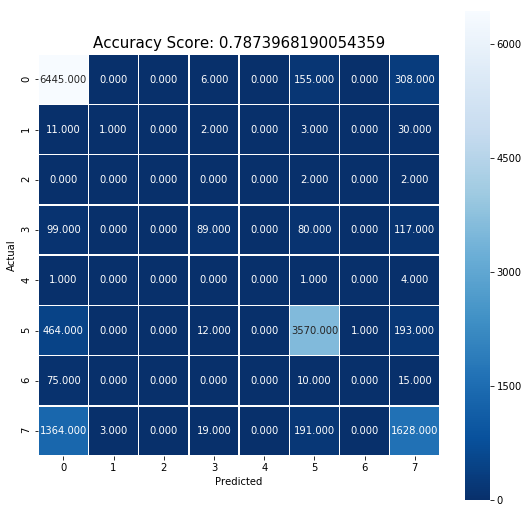

In [30]:
plt.figure(figsize=(9,9))
sns.heatmap((confusion_matrix(y_test, rf_predict)), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: 0.7873968190054359'
plt.title(all_sample_title, size = 15);